In [1]:
%tensorflow_version 2.x
!wget https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz


--2020-12-03 04:12:24--  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4jw31k5mlzcmgis/genres.tar.gz [following]
--2020-12-03 04:12:24--  https://www.dropbox.com/s/raw/4jw31k5mlzcmgis/genres.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc23f26e4976bbf9d6fb76d3b9c0.dl.dropboxusercontent.com/cd/0/inline/BEVmdEy9tzh2OKa5FFTRrukzomAy4pkc31vysruAwx5Es6LqFk3WbNK7FhPMg_wurTYcP4l4Ftzit4pHv9yAd5X9eIs0pb7hawFvEfn4yv_vgw/file# [following]
--2020-12-03 04:12:25--  https://uc23f26e4976bbf9d6fb76d3b9c0.dl.dropboxusercontent.com/cd/0/inline/BEVmdEy9tzh2OKa5FFTRrukzomAy4pkc31vysruAwx5Es6LqFk3WbNK7FhPMg_wurTYcP4l4Ftzit4pHv9yAd5X9eIs0pb7hawFvEfn4yv_vgw/file
Resolving uc23f2

In [2]:
!tar xvzf /content/genres.tar.gz      
#extract contents of .tar.gz file


genres/
genres/blues/
genres/blues/blues.00000.au
genres/blues/blues.00001.au
genres/blues/blues.00002.au
genres/blues/blues.00003.au
genres/blues/blues.00004.au
genres/blues/blues.00005.au
genres/blues/blues.00006.au
genres/blues/blues.00007.au
genres/blues/blues.00008.au
genres/blues/blues.00009.au
genres/blues/blues.00010.au
genres/blues/blues.00011.au
genres/blues/blues.00012.au
genres/blues/blues.00013.au
genres/blues/blues.00014.au
genres/blues/blues.00015.au
genres/blues/blues.00016.au
genres/blues/blues.00017.au
genres/blues/blues.00018.au
genres/blues/blues.00019.au
genres/blues/blues.00020.au
genres/blues/blues.00021.au
genres/blues/blues.00022.au
genres/blues/blues.00023.au
genres/blues/blues.00024.au
genres/blues/blues.00025.au
genres/blues/blues.00026.au
genres/blues/blues.00027.au
genres/blues/blues.00028.au
genres/blues/blues.00029.au
genres/blues/blues.00030.au
genres/blues/blues.00031.au
genres/blues/blues.00032.au
genres/blues/blues.00033.au
genres/blues/blues.00034.a

In [3]:
!rm /content/genres.tar.gz


In [4]:
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras import utils
from keras.utils import to_categorical
import librosa
""" 
  it is a python module to anayze audio signals in general bit geared more toards music
  it includes the nuts and bolts to build a Music Information Retrived system
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import pathlib
import csv
import shutil
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd



In [5]:
#Coverting Audio Data to Spectrogram
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))

genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/content/genres/{g}'):
        songname = f'/content/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.jpg')
        plt.clf()

<Figure size 720x720 with 0 Axes>

In [6]:
genres


['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [7]:
# import IPython.display as ipd
# sound_file = '/content/genres/hiphop/hiphop.00000.au'
# ipd.Audio(sound_file,autoplay=True)


In [8]:
audio_data = '/content/genres/blues/blues.00000.au'
data , sr = librosa.load(audio_data)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [9]:
data , sr = librosa.load(audio_data)
"""
    loads and decodes the audio as atime series y, represented as a one-dimensional Numpy floating point array.
    the variable sr contains the sampling rate of y, that is, the nuber of samples per second of audio is mixed 
    to mono and resampled to 22050 Hz at load time. this behavior can be overridden by suppying additional arguments
    to librosa.load() Audio will be automatically resampled to the given rate (default sr= 2205).
    to preserve the native sampling rate of the file, use sr=None.
    we can change this behavior by resampling at 45.6khz
"""

'\n    loads and decodes the audio as atime series y, represented as a one-dimensional Numpy floating point array.\n    the variable sr contains the sampling rate of y, that is, the nuber of samples per second of audio is mixed \n    to mono and resampled to 22050 Hz at load time. this behavior can be overridden by suppying additional arguments\n    to librosa.load() Audio will be automatically resampled to the given rate (default sr= 2205).\n    to preserve the native sampling rate of the file, use sr=None.\n    we can change this behavior by resampling at 45.6khz\n'

In [10]:
import IPython
IPython.display.Audio(data, rate=sr)

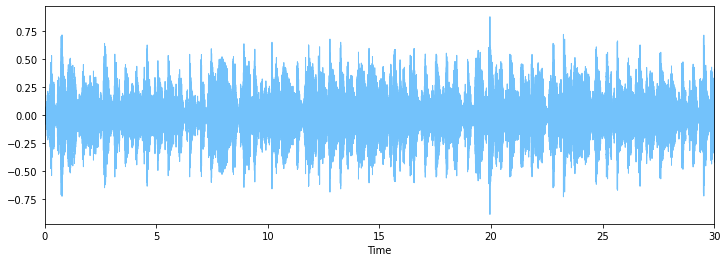

In [11]:
# plot Raw Wave plot is the amplitude envelope of a waveform
plt.figure(figsize=(12,4))
librosa.display.waveplot(data, color = "#73c2fb")
# start # - e34234  00416a 08457e 0f4d92 003366 0047ab e34234 996515 29ab87 73c2fb ee82ee dfff00 fffdd0 fffacd ccff00 fbec5d
plt.show()

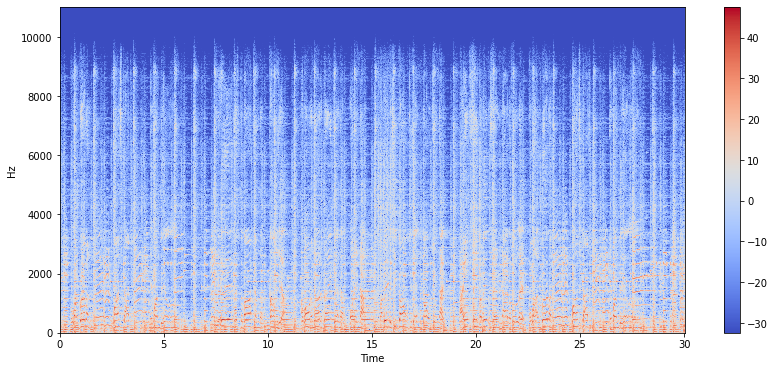

In [12]:
"""
  A spectrogram is a visual way of representing the signal loudness of a signal over time at various frequencies present 
  in a particular waveform. not only can one see whether there is more or less energy at for example, 2HZ vs 10 Hz, but 
  one can also see how energy levels vary over time 

"""
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
#The default for librosa. amplitude_to_db is to compute numpy. max , meaning that the max value of the input will be mapped to 0 dB. All other values will then be negative.
#The function also applies a threshold on the range of sounds by 80db. so anything lower than -80 db will be clipped -80 db.

plt.figure(figsize=(14, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()


In [13]:
X,X.shape

(array([[-5.28017139e+00-0.0000000e+00j, -3.70380926e+00-0.0000000e+00j,
         -2.53658724e+00-0.0000000e+00j, ...,
          3.10940504e+00-0.0000000e+00j, -4.33118105e-01-0.0000000e+00j,
         -1.74286175e+01-0.0000000e+00j],
        [ 4.27672338e+00+1.0408341e-16j,  8.50443125e-01+1.6163833e+00j,
          1.28570247e+00-2.8567898e-01j, ...,
         -2.20653963e+00+2.1858121e-01j, -3.14449644e+00-3.2049682e+00j,
          1.12701941e+01-1.3743819e+01j],
        [-3.94051814e+00-1.4770683e-17j,  1.57026231e+00+4.1647038e-01j,
         -1.75258324e-01+7.0544934e-01j, ...,
         -5.07911384e-01-1.4191605e+00j, -6.45651579e-01-1.5557450e+00j,
          2.28059745e+00+1.6550421e+01j],
        ...,
        [-8.06762557e-03+4.3623413e-18j,  3.98801966e-03-1.9650784e-04j,
         -1.77181300e-05+2.0720602e-04j, ...,
          2.41400747e-04-1.1797844e-04j, -6.74371433e-04+1.6490875e-03j,
          2.47839396e-03-1.0946114e-02j],
        [ 7.85761513e-03-1.0928758e-16j, -9.4338511

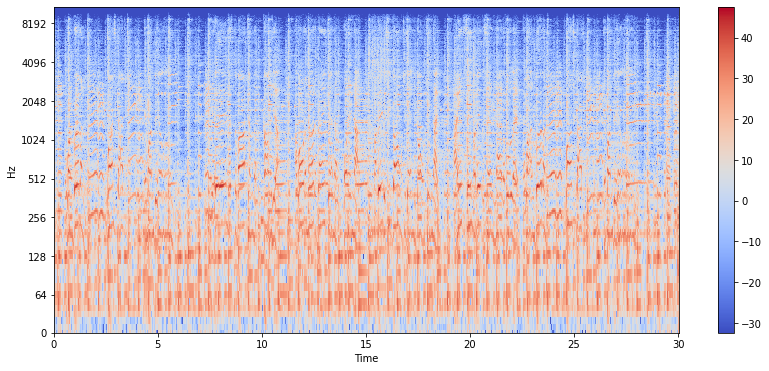

In [14]:
# the vertical axis represents frequencies (from o to 10khz), and the horizontal axis represent time of the clip
# let's convert the frequency axis to a logarithm, because we see that all actions (in red) is taking place at the bottom of the specturm

plt.figure(figsize=(14, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [15]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]

In [16]:
spectral_rolloff

array([4877.27050781, 4618.87207031, 4694.23828125, ..., 2616.28417969,
       2982.34863281, 2928.515625  ])

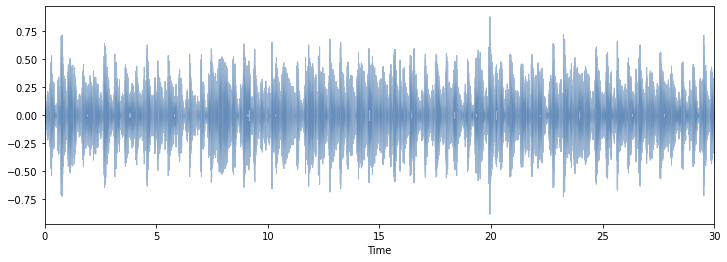

In [17]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sr, alpha=0.4, color = '#0f4d92' )

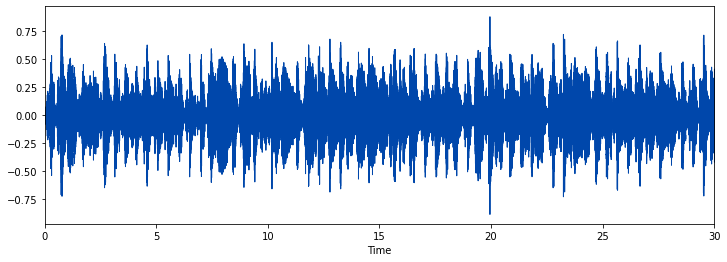

In [18]:
#Spectral rolloff point is defined as the Nth percentile frequency of the power spectral distribution, where N is usually 85% or 95%. The rolloff point is the frequency below which the N% of the magnitude distribution is concentrated. 
#zero-Crossing Rate a zero crossing is said to occur if successive samples have different algebraic signs. the rate
# The rate at which zero crossings occur is a simple measure of the frequency content of a signal.
# zero-crossing rate is a measure of number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sr, color = '#0047ab')

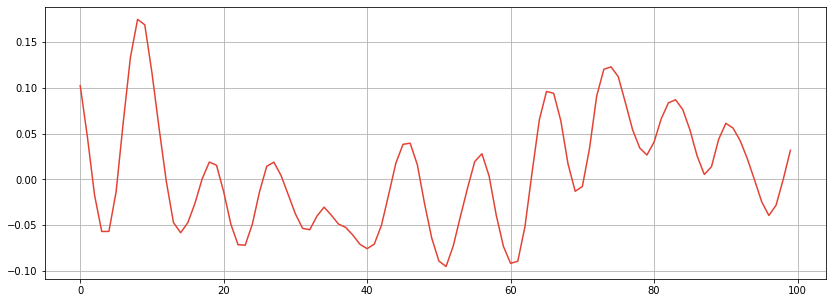

In [19]:
# Zooming 
n = 9000
nn = 9100
plt.figure(figsize=(14, 5))
plt.plot(data[n:nn], '#e34234')
plt.grid()

In [20]:
# the graph shows zero crossings
zero_crossing = librosa.zero_crossings(data[n:nn], pad=False)
print(zero_crossing)
print("the number of Zero_crossings is :", sum(zero_crossing))

[False False  True False False False  True False False False False False
  True False False False False  True False False  True False False False
 False False  True False False  True False False False False False False
 False False False False False False False False  True False False False
  True False False False False False False  True False False  True False
 False False False  True False False False False False  True False  True
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False  True]
the number of Zero_crossings is : 16


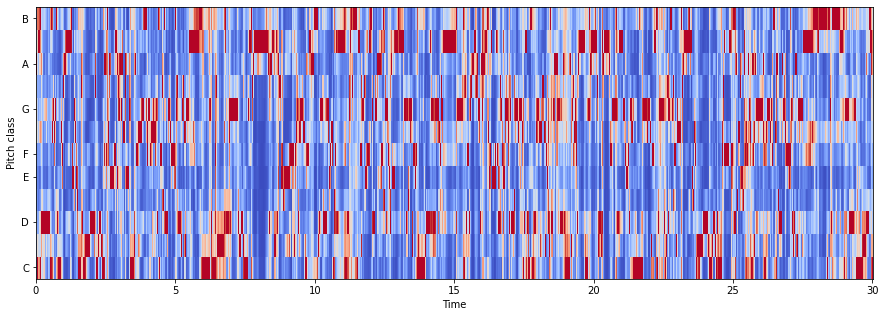

In [21]:
""" 
    Chroma Feature- is a powerful for analyzing music whose pitches can be meaningfully categorized(often into twelve categories)
    and whose tuning approximates to the equal-tempered scale. one main property of croma features is that capture harmonic and 
    melodic charcteristics of music, while being robust to changes in timbre and instrumentation.

"""
chromagram = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis="time", y_axis='chroma', cmap='coolwarm')

In [22]:
# Ploting the Spectrogram for each Genre

def plot_spectrogram(genre):
    '''
    This function takes in a list of genres and plots a mel spectrogram for one song 
    per genre.
    
    '''
    
    # Loading in the audio file
    y, sr = librosa.core.load(f'/content/genres/{genre}/{genre}.00000.au')
    
    # Computing the spectrogram and transforming it to the decibal scale
    spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    spect = librosa.power_to_db(spect, ref=np.max) # Converting to decibels
    
    # Plotting the transformed spectrogram
    plt.figure(figsize=(10,7))
    librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
    plt.title(str(genre))
    plt.show()



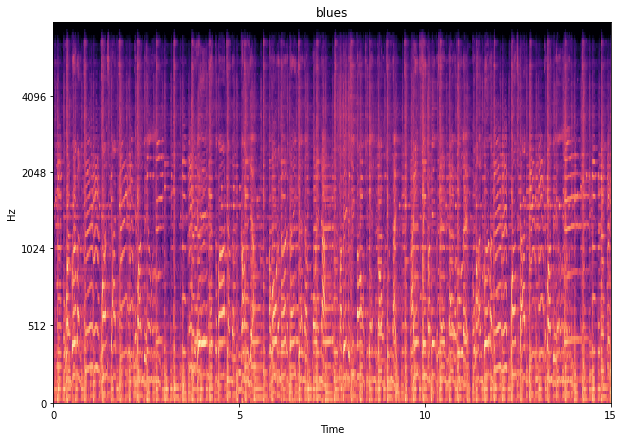

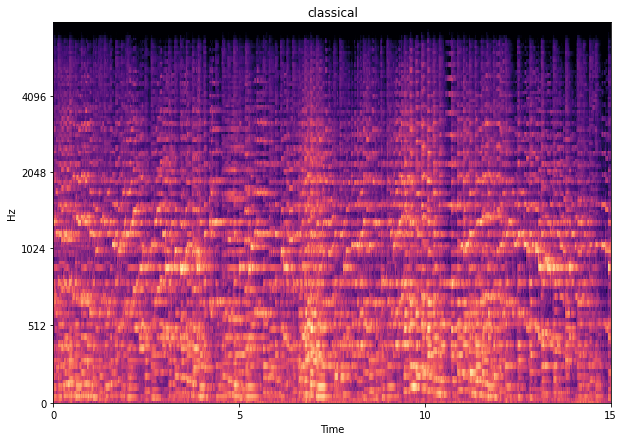

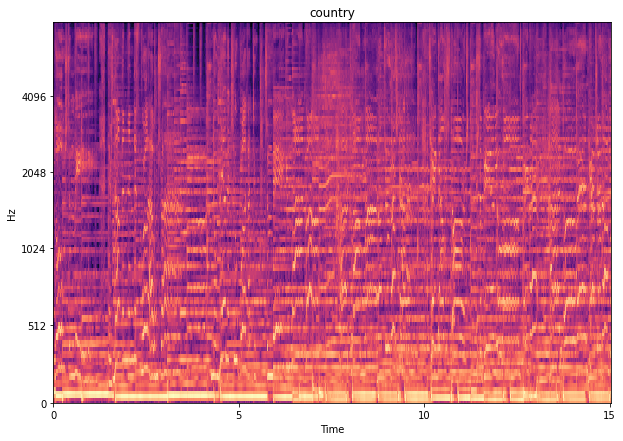

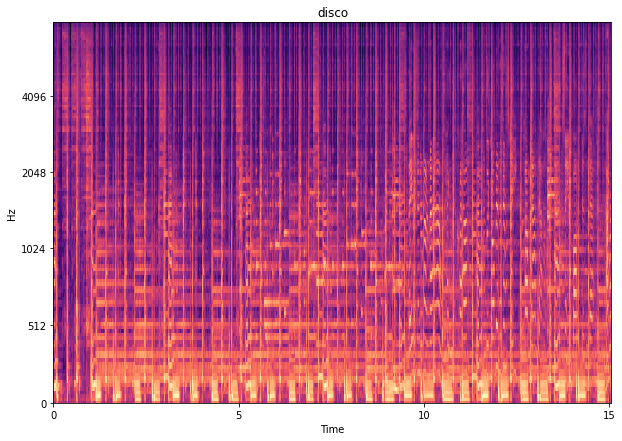

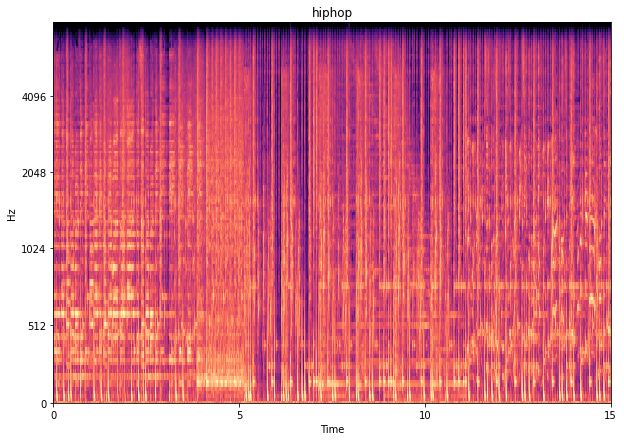

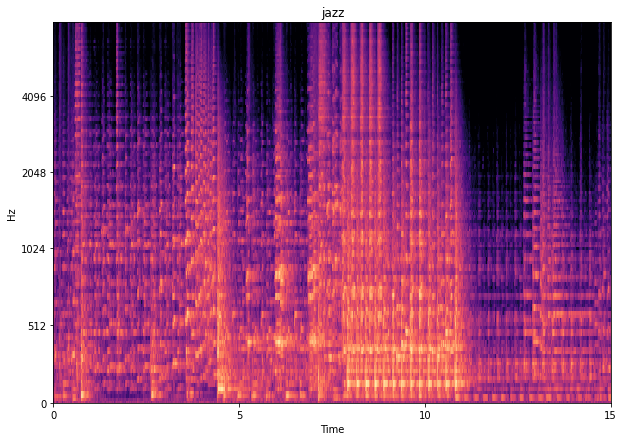

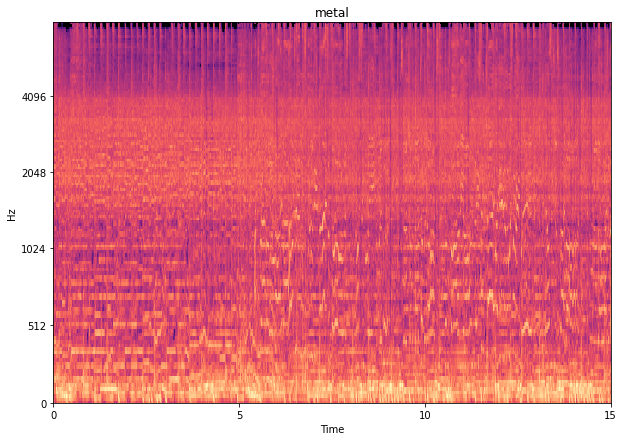

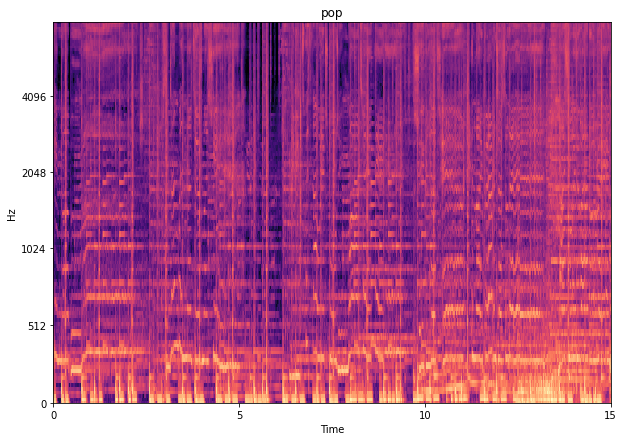

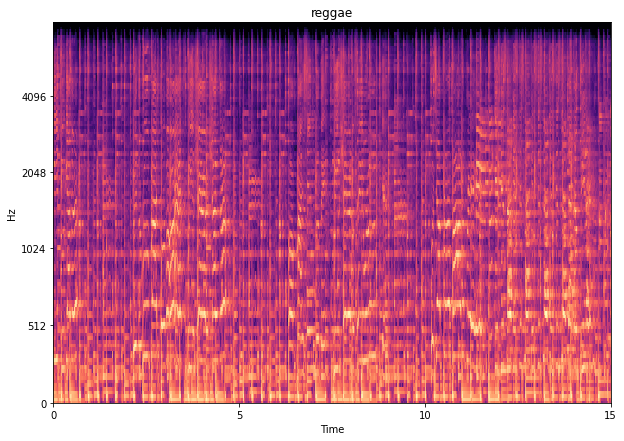

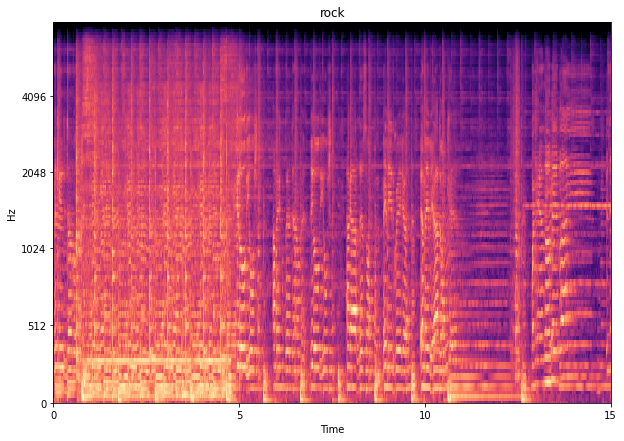

In [23]:
# Plotting spectrogram for each genre
for genre in genres:
    plot_spectrogram(genre)


In [24]:
# Splitting the Dataset into Train,Validation and Test Folders
dir = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for d in dir:
    #Train folder
    pathlib.Path(f'train/{d}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/content/img_data/{d}'):
        spect_img_trn = f'/content/img_data/{d}'
    #Test folder
    pathlib.Path(f'test/{d}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/content/img_data/{d}'):
        spect_img_test = f'/content/img_data/{d}'
    #Validation folder
    pathlib.Path(f'validation/{d}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/content/img_data/{d}'):
        spect_img_test = f'/content/img_data/{d}'


    # Creating partitions of the data after shuffeling
    currentCls = f'/content/img_data/{d}'
    src = currentCls # Folder to copy images from

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    # print('Total images: ', len(allFileNames))
    # print('Training: ', len(train_FileNames))
    # print('Validation: ', len(val_FileNames))
    # print('Testing: ', len(test_FileNames))

        # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name,f'/content/train/{d}')

    for name in val_FileNames:
        shutil.copy(name, f'/content/validation/{d}')

    for name in test_FileNames:
        shutil.copy(name, f'/content/test/{d}')


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

WIDTH = 300
HEIGHT = 300
BATCH_SIZE = 100
TRAIN_DIR='/content/train'
VAL_DIR=r'/content/validation'

# data prep
train_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = validation_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')


Found 700 images belonging to 10 classes.
Found 150 images belonging to 10 classes.


In [27]:


from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import InceptionV3
#from keras.preprocessing import image

IMAGE_SIZE = [300, 300]   

"""loading the weights of VGG16 without the top layer.
   These weights are trained on Imagenet dataset."""

pre_trained_model = InceptionV3(input_shape = IMAGE_SIZE + [3], weights = "imagenet", include_top = False)  
"""
Inception Modules are used in Convolutional Neural Networks to allow for more efficient computation and 
deeper Networks through a dimensionality reduction with stacked 1×1 convolutions. The modules 
were designed to solve the problem of computational expense, as well as overfitting, among other issues.

ImageNet is a project which aims to provide a large image database for research purposes. 
It contains more than 14 million images which belong to more than 20,000 classes ( or synsets ). 
They also provide bounding box annotations for around 1 million images, which can be used in
Object Localization tasks.

weights: One of None (random initialization), imagenet (pre-training on ImageNet), or 
the path to the weights file to be loaded. Default to imagenet.

include_top: Boolean, whether to include the fully-connected layer at the top, 
as the last layer of the network. Default to True.


"""

# this will exclude the initial layers from training phase as there are already been trained.
for layer in pre_trained_model.layers:
    layer.trainable = False

""" 
  Make the model non-trainable, since we will only use it for feature extraction; 
  we won't update the weights of the pretrained model during training.
for layers in pre_trained_model.layers:
    layers.trainable = False

"""

last_layer = pre_trained_model.get_layer('mixed7')
#print('last layer output shape: ', last_layer.output_shape)
""" 
The layer we will sue for feature extraction in inception v3 is called mixed7.
it is not the bottleneck of the network, but we are using it to keep a
sufficiently large feature map (7x7 in this case). 
(Using the bottleneck layer would have resulting in a 3x3 feature map, which is a bit small.)

"""
last_output = last_layer.output

# Stick a fully connected classifier on top of last_output
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)

# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(10, activation='softmax')(x)           

model = Model(inputs = pre_trained_model.input, outputs = x) 

adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=adam,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


87916544/87910968 [==============================] - 0s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________

In [29]:
# [300, 300] + [3]

# Initializing a random seed for replication purposes
np.random.seed(23456)
tf.random.set_seed(123)
"""
This sets the global seed. Its interactions with operation-level seeds is as follows: 
If neither the global seed nor the operation seed is set: 
A randomly picked seed  Operations that rely on a random seed actually derive it from 
two seeds: the global and operation-level seeds. This sets the global seed. 
Its interactions with operation-level seeds is as follows: If neither the global seed nor the operation seed is set: A randomly picked seed is used for this op

"""

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.735):
            print("\nReached 74% val_accuracy so cancelling training!")
            self.model.stop_training = True


from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0.000001, patience=50,
                          verbose=1, mode='auto')
callbacks = myCallback()
# patience: Number of epochs with no improvement after which training will be stopped.

history = model.fit(train_generator,
                              epochs=500000,
                              steps_per_epoch = 700 // BATCH_SIZE,
                              validation_data=validation_generator,
                              validation_steps = 150 // BATCH_SIZE, 
                              verbose = 2,
                              callbacks=[earlystop,callbacks])


Epoch 1/500000
7/7 - 9s - loss: 2.5360 - accuracy: 0.1400 - val_loss: 2.1543 - val_accuracy: 0.2000
Epoch 2/500000
7/7 - 8s - loss: 2.1309 - accuracy: 0.2514 - val_loss: 1.7177 - val_accuracy: 0.3600
Epoch 3/500000
7/7 - 8s - loss: 1.7270 - accuracy: 0.3600 - val_loss: 1.4836 - val_accuracy: 0.5100
Epoch 4/500000
7/7 - 8s - loss: 1.4581 - accuracy: 0.4900 - val_loss: 1.3948 - val_accuracy: 0.5300
Epoch 5/500000
7/7 - 8s - loss: 1.2699 - accuracy: 0.5786 - val_loss: 1.2969 - val_accuracy: 0.5000
Epoch 6/500000
7/7 - 8s - loss: 1.1277 - accuracy: 0.5986 - val_loss: 1.3058 - val_accuracy: 0.5800
Epoch 7/500000
7/7 - 8s - loss: 1.0098 - accuracy: 0.6557 - val_loss: 1.1739 - val_accuracy: 0.5900
Epoch 8/500000
7/7 - 8s - loss: 0.9063 - accuracy: 0.7286 - val_loss: 1.0884 - val_accuracy: 0.6300
Epoch 9/500000
7/7 - 8s - loss: 0.7994 - accuracy: 0.7614 - val_loss: 1.0043 - val_accuracy: 0.6200
Epoch 10/500000
7/7 - 8s - loss: 0.7103 - accuracy: 0.7871 - val_loss: 1.0844 - val_accuracy: 0.5800

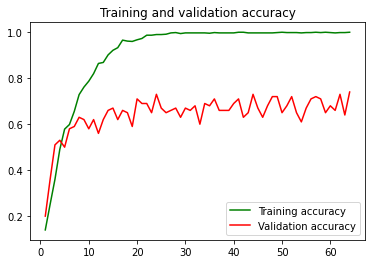

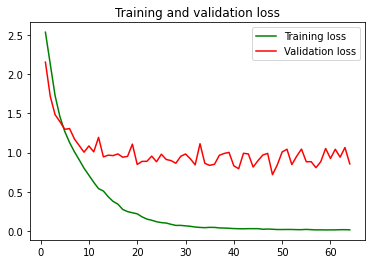

In [31]:
# Plot results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [39]:
validation_generator = validation_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False)
predictions = model.predict(validation_generator)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys()) 
from sklearn.metrics import confusion_matrix,classification_report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Found 150 images belonging to 10 classes.
              precision    recall  f1-score   support

       blues       0.57      0.53      0.55        15
   classical       0.83      1.00      0.91        15
     country       0.58      0.47      0.52        15
       disco       0.53      0.53      0.53        15
      hiphop       0.87      0.87      0.87        15
        jazz       0.79      0.73      0.76        15
       metal       0.88      0.93      0.90        15
         pop       0.76      0.87      0.81        15
      reggae       0.62      0.67      0.65        15
        rock       0.46      0.40      0.43        15

    accuracy                           0.70       150
   macro avg       0.69      0.70      0.69       150
weighted avg       0.69      0.70      0.69       150



In [40]:
#Merging Train and validation set
import glob
import shutil
import os

dir = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for d in dir:
    train_dir = f'/content/train/{d}'
    validation_dir =f'/content/validation/{d}' 

    for img in glob.iglob(os.path.join(validation_dir, "*.jpg")):
      shutil.copy(img, train_dir)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

WIDTH = 300
HEIGHT = 300
BATCH_SIZE = 100
TRAIN_DIR='/content/train'
TEST_DIR=r'/content/test'

# data prep
train_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

# Initializing a random seed for replication purposes
np.random.seed(23456)
tf.random.set_seed(123)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.745):
            print("\nReached 75% accuracy so cancelling training!")
            self.model.stop_training = True


from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0.000001, patience=50,
                          verbose=1, mode='auto')
callbacks = myCallback()

history = model.fit(train_generator,
                              epochs=150,
                              steps_per_epoch = 700 // BATCH_SIZE,
                              validation_data=test_generator,
                              validation_steps = 150 // BATCH_SIZE, 
                              verbose = 2,
                              callbacks=[earlystop,callbacks])



Found 850 images belonging to 10 classes.
Found 150 images belonging to 10 classes.
Epoch 1/150
7/7 - 9s - loss: 0.2107 - accuracy: 0.9369 - val_loss: 1.0115 - val_accuracy: 0.6500
Epoch 2/150

Reached 75% accuracy so cancelling training!
7/7 - 7s - loss: 0.2100 - accuracy: 0.9292 - val_loss: 0.7922 - val_accuracy: 0.7500


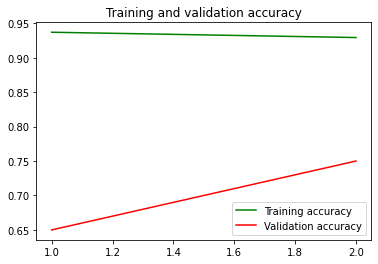

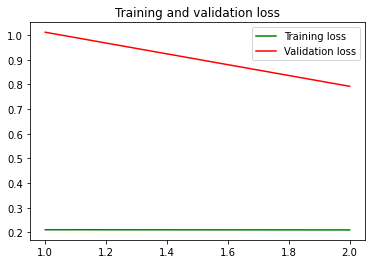

In [42]:
# Plot results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [43]:
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False)

predictions = model.predict(test_generator)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

predicted_classes



Found 150 images belonging to 10 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 9, 2, 2, 0, 9, 2, 2, 2,
       0, 3, 3, 3, 3, 3, 8, 2, 8, 3, 3, 3, 4, 0, 4, 3, 3, 4, 4, 4, 4, 4,
       8, 4, 4, 4, 7, 4, 4, 4, 4, 0, 5, 0, 0, 0, 5, 5, 0, 5, 1, 8, 3, 8,
       5, 5, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 0, 6, 9, 7, 7, 9, 9, 7,
       7, 3, 7, 8, 7, 4, 7, 7, 7, 7, 0, 8, 8, 0, 3, 8, 8, 8, 7, 3, 8, 4,
       7, 8, 8, 0, 6, 8, 9, 9, 9, 8, 9, 1, 8, 2, 9, 9, 9, 9])

In [44]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


              precision    recall  f1-score   support

       blues       0.54      1.00      0.70        15
   classical       0.88      1.00      0.94        15
     country       0.83      0.67      0.74        15
       disco       0.60      0.60      0.60        15
      hiphop       0.75      0.80      0.77        15
        jazz       1.00      0.40      0.57        15
       metal       0.92      0.80      0.86        15
         pop       0.77      0.67      0.71        15
      reggae       0.47      0.53      0.50        15
        rock       0.62      0.53      0.57        15

    accuracy                           0.70       150
   macro avg       0.74      0.70      0.70       150
weighted avg       0.74      0.70      0.70       150

